<a href="https://colab.research.google.com/github/Uluc/machine_learning/blob/main/pca_with_graphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hw3_pen_data.txt to hw3_pen_data.txt


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hw3_pen_data.txt']), header=None, sep=',', names=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16', 'target'])

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
z = pca.fit_transform(x)
principalDf = pd.DataFrame(data = z
             , columns = ['principal component 1', 'principal component 2'])

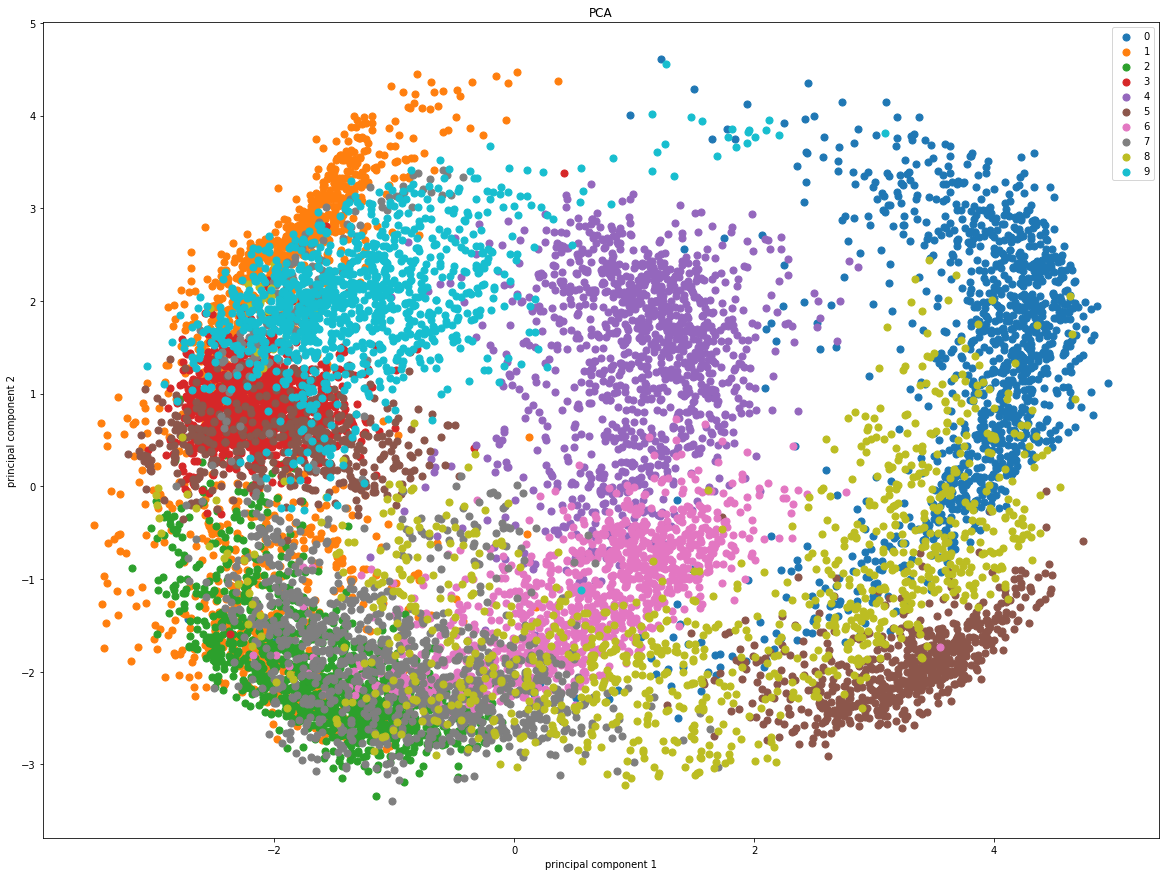

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
plt.figure(figsize=(20,15))
targets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 
 
for target in targets:
    indicesToKeep = finalDf['target'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50, label=target)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()